In [12]:
import os, cv2, glob

import numpy as np 

import matplotlib.pyplot as plt 

In [2]:
DATA_DIR = os.path.join('data')
paths = glob.glob(os.path.join(DATA_DIR, '*.png'))

In [50]:
def rotate(img, angle=90, scale=1.0):
    h, w, _ = img.shape
    x_c, y_c = w//2, h//2 
    
    m = cv2.getRotationMatrix2D((x_c, y_c), angle, scale)
    outs = cv2.warpAffine(img, m, (w, h))
    return outs 

def plot_imshow(img, types='hwc', fname='sample.pdf', savefig=False):
    if types == 'chw':
        img = np.transpose(img, (1, 2, 0))
    
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    if savefig:
        plt.savefig(fname, dpi=200)
    plt.show()
    
    
def detector(img1, img2, model):
    h, w, _ = img1.shape
    k1, d1 = model.detectAndCompute(img1, None)
    k2, d2 = model.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    
    matches = bf.match(d1, d2)
    matches = sorted(matches, key=lambda x: x.distance)
    no_of_matches = len(matches)
    
    p1 = np.zeros((no_of_matches, 2))
    p2 = np.zeros((no_of_matches, 2))
    
    for i in range(len(matches)):
        p1[i, :] = k1[matches[i].queryIdx].pt
        p2[i, :] = k2[matches[i].trainIdx].pt
    
    homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
    
    transformed_img = cv2.warpPerspective(img2, homography, (w, h))
    
    outs = cv2.drawMatches(img1, k1, img2, k2, matches[:20], None, flags=2)
    
    return outs, transformed_img 
    

In [31]:
imgs = cv2.imread(paths[0])
imgs2 = cv2.imread(paths[1])

imgs = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB) # BGR -> RGB
imgs2 = cv2.cvtColor(imgs2, cv2.COLOR_BGR2RGB)

rotated_imgs = rotate(imgs)

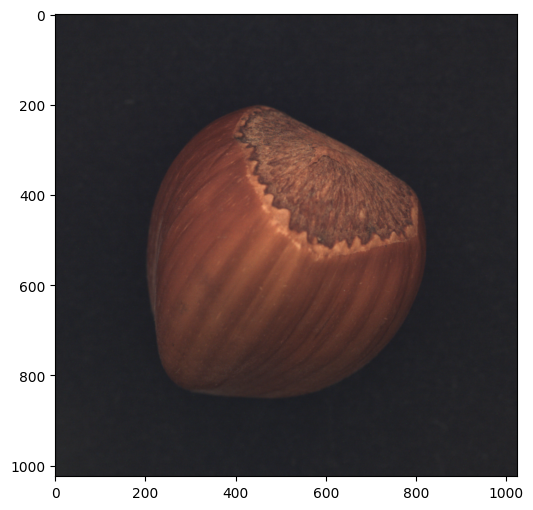

In [32]:
plot_imshow(imgs)

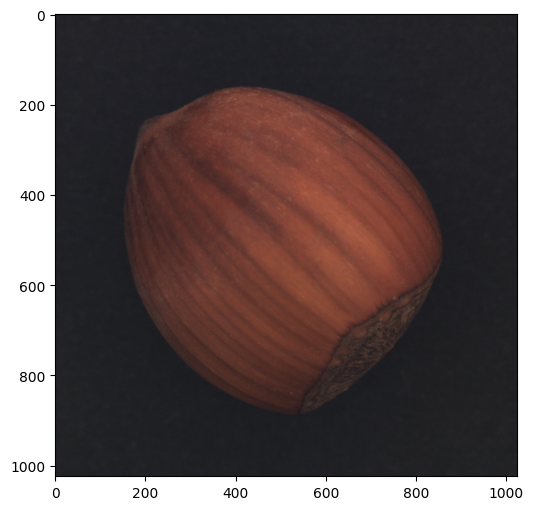

In [33]:
plot_imshow(imgs2)

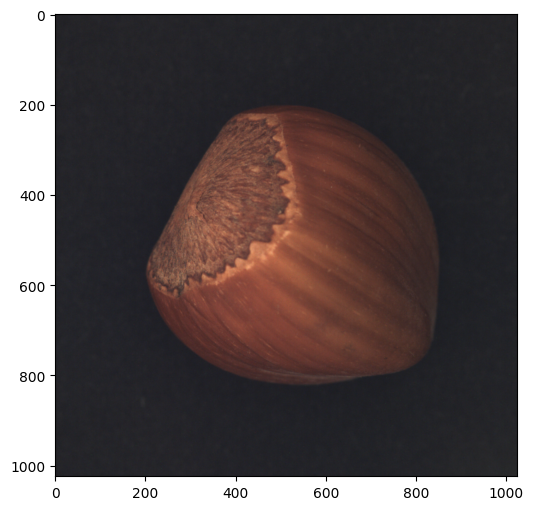

In [34]:
plot_imshow(rotated_imgs)

### ORB Registration

In [39]:
orb_detector = cv2.ORB_create()

imgs = cv2.normalize(imgs, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
imgs2 = cv2.normalize(imgs2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
rotated_imgs = cv2.normalize(rotated_imgs, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

In [51]:
matched_img, transformed_img = detector(imgs, rotated_imgs, orb_detector)

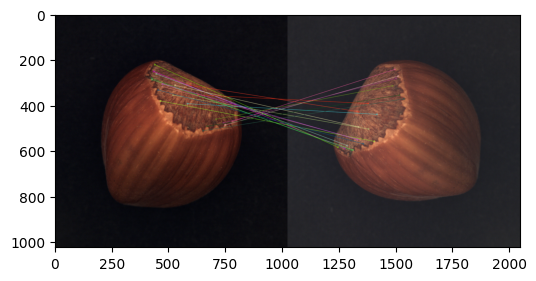

In [52]:
plot_imshow(matched_img)

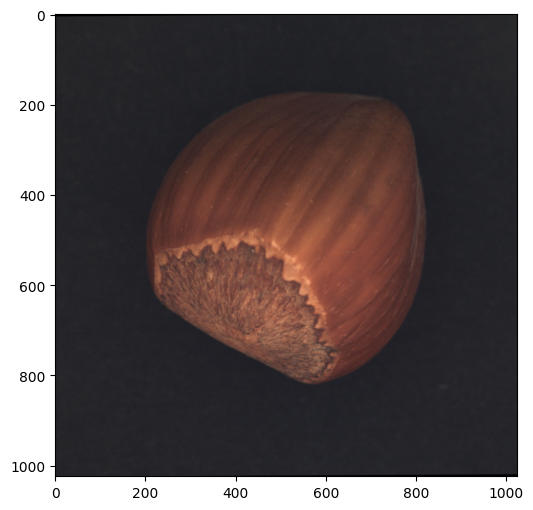

In [53]:
plot_imshow(transformed_img)